# HW1

## Load the necessary packages

In [45]:
# we are going to download and load a dataset from UCI repository:
# http://archive.ics.uci.edu/ml/datasets/Arrhythmia
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

## Load data

In [40]:
# Data from the postoperative-patient dataset (UCI Machine Learning Repository)
names = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'ADM-DECS']
data = pd.read_csv('../data/post-operative.data', header = None, names = names, )

In [3]:
# show descriptive statistics
DataFrameSummary(data).summary()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
count,90,90,90,90,90,90,90,90,90
unique,3,3,2,3,2,3,3,5,4
top,mid,mid,good,mid,unstable,stable,stable,10,A
freq,58,48,47,57,45,83,46,65,63
counts,90,90,90,90,90,90,90,90,90
uniques,3,3,2,3,2,3,3,5,4
missing,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,categorical,bool,categorical,bool,categorical,categorical,categorical,categorical


In [4]:
# show the top 5 rows of data
data.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [9]:
set(data['COMFORT'])

{'05', '07', '10', '15', '?'}

## Plot Relationships between categorical variables and "COMFORT"

In [20]:
# drop rows with unknown "COMFORT" calue, and convert "COMFORT" column to int type
data_selected = data[data.COMFORT != '?'].astype(dtype = {'COMFORT': 'int32'})

In [32]:
# remove redundant spaces or newlines (e.g. in column ADM-DECS, there are "A"s while there is also "A ", whose space should be removed)
data_selected = data_selected.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#### L-CORE (patient's internal temperature in C)

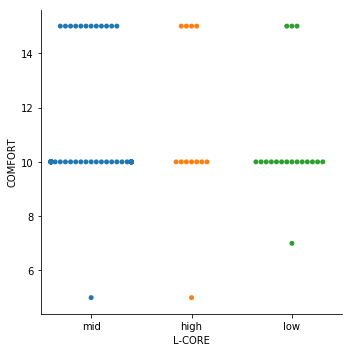

In [21]:
sns.catplot(x = 'L-CORE', y = 'COMFORT', kind = 'swarm', data = data_selected)

From the figure above, we can see that the distribution of COMFORT value is similar among three kinds of L-CORE

#### L-SURF (patient's surface temperature in C)

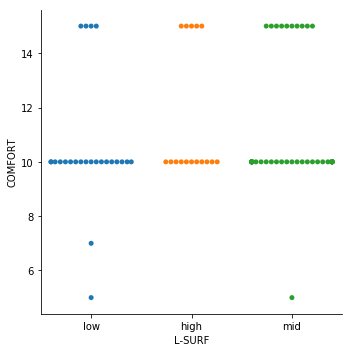

In [16]:
sns.catplot(x = 'L-SURF', y = 'COMFORT', kind = 'swarm', data = data_selected)

As shown in the figure above, it seems that the value "mid" of L-SURF has the highest proportion of a high COMFORT value, while the value "low" of L-SURF tends to have the lowest proportion of high COMFORT value

#### L-O2 (oxygen saturation in %)

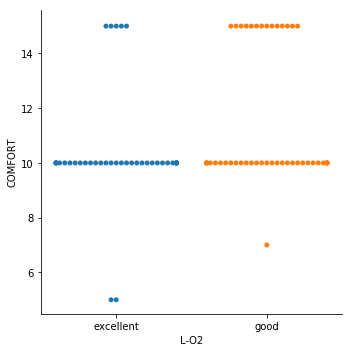

In [17]:
sns.catplot(x = 'L-O2', y = 'COMFORT', kind = 'swarm', data = data_selected)

For L-O2, all the lowest COMFORT values are in "excellent" group, and "good" tends to have a higher COMFORT value

#### L-BP (last measurement of blood pressure)

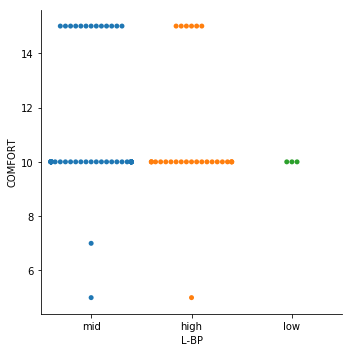

In [22]:
sns.catplot(x = 'L-BP', y = 'COMFORT', kind = 'swarm', data = data_selected)

"low" L-BP only has one COMFORT value 10, and "mid" L-BP seems tend to have a higher COMFORT value

#### SURF-STBL (stability of patient's surface temperature)

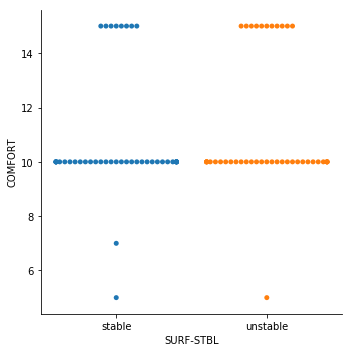

In [23]:
sns.catplot(x = 'SURF-STBL', y = 'COMFORT', kind = 'swarm', data = data_selected)

"stable" and "unstable" of patient's surface temperature

#### CORE-STBL (stability of patient's core temperature) 

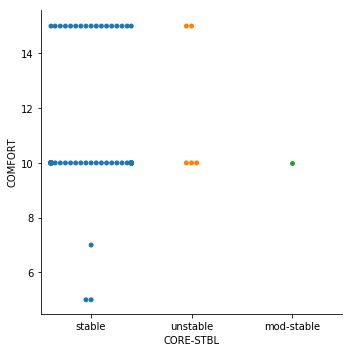

In [24]:
sns.catplot(x = 'CORE-STBL', y = 'COMFORT', kind = 'swarm', data = data_selected)

In "stable" and "unstable" groups, the COMFORT value 15 and 10 are almost the same

#### BP-STBL (stability of patient's blood pressure) 

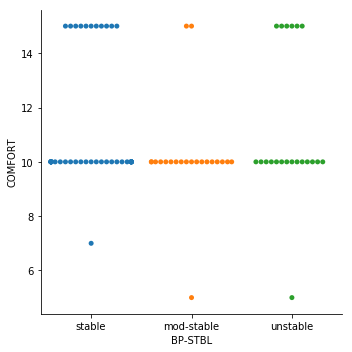

In [25]:
sns.catplot(x = 'BP-STBL', y = 'COMFORT', kind = 'swarm', data = data_selected)

"stable" patient's blood pressure tends to have a higher COMFORT value

#### decision ADM-DECS (discharge decision)

I (patient sent to Intensive Care Unit),
S (patient prepared to go home),
A (patient sent to general hospital floor)

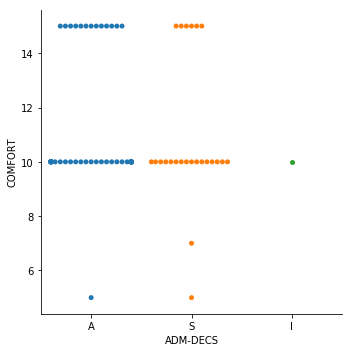

In [33]:
sns.catplot(x = 'ADM-DECS', y = 'COMFORT', kind = 'swarm', data = data_selected)

Patients with I (patient sent to Intensive Care Unit) tends to have a higher COMFORT value

## Data Preprocessing

### Missing Data Imputation

There are some missing data in COMFORT, which represented by "?". And COMFORT is a numeric variable, so impute the missing values with mean value

In [39]:
str(data_selected.COMFORT.mean())

'10.942528735632184'

In [41]:
data.replace({'?': str(data_selected.COMFORT.mean())}, inplace = True)

In [85]:
data.COMFORT = data.COMFORT.astype({'COMFORT': 'float64'})

Since all input categorical variables (not include target variable "ADM-DECS") are ordinal, and many machine learning algorithms requires input variables to be numbers instead of strings, I chose to use label encoder to convert them to numbers

#### Label Encoding for L-CORE

In [46]:
set(data['L-CORE'])

{'high', 'low', 'mid'}

In [47]:
le.fit(['low', 'mid', 'high'])

LabelEncoder()

In [54]:
data["L-CORE"] = le.transform(data["L-CORE"])

#### Label Encoding for L-SURF

In [56]:
set(data['L-SURF'])

{'high', 'low', 'mid'}

In [57]:
le.fit(['low', 'mid', 'high'])

LabelEncoder()

In [58]:
data["L-SURF"] = le.transform(data["L-SURF"])

#### Label Encoding for L-O2

In [59]:
set(data['L-O2'])

{'excellent', 'good'}

In [60]:
le.fit(['good', 'excellent'])

LabelEncoder()

In [61]:
data["L-O2"] = le.transform(data["L-O2"])

#### Label Encoding for L-BP

In [62]:
set(data['L-BP'])

{'high', 'low', 'mid'}

In [63]:
le.fit(['low', 'mid', 'high'])

LabelEncoder()

In [64]:
data["L-BP"] = le.transform(data["L-BP"])

#### Label Encoding for SURF-STBL

In [65]:
set(data['SURF-STBL'])

{'stable', 'unstable'}

In [66]:
le.fit(['unstable', 'stable'])

LabelEncoder()

In [67]:
data["SURF-STBL"] = le.transform(data["SURF-STBL"])

#### Label Encoding for CORE-STBL

In [68]:
set(data['CORE-STBL'])

{'mod-stable', 'stable', 'unstable'}

In [69]:
le.fit(['unstable', 'mod-stable', 'stable'])

LabelEncoder()

In [70]:
data["CORE-STBL"] = le.transform(data["CORE-STBL"])

#### Label Encoding for BP-STBL

In [71]:
set(data['BP-STBL'])

{'mod-stable', 'stable', 'unstable'}

In [72]:
le.fit(['unstable', 'mod-stable', 'stable'])

LabelEncoder()

In [73]:
data["BP-STBL"] = le.transform(data["BP-STBL"])

### Data Normalization

Since many algorithms (such as Regularized Logistic Regression) need variables to be in a similar scale, I do data normalization for all input variables

In [87]:
X = data[names[0:-1]].values

In [88]:
# set axis to 0 to normalize each feature
x = preprocessing.normalize(X, axis = 0)

show 5 samples

In [94]:
x[0:5]

array([[0.12623888, 0.06788442, 0.        , 0.13159034, 0.        ,
        0.09667365, 0.08512565, 0.14152696],
       [0.12623888, 0.        , 0.        , 0.        , 0.        ,
        0.09667365, 0.08512565, 0.09435131],
       [0.        , 0.06788442, 0.        , 0.        , 0.        ,
        0.09667365, 0.        , 0.09435131],
       [0.12623888, 0.06788442, 0.14586499, 0.        , 0.        ,
        0.1933473 , 0.        , 0.14152696],
       [0.12623888, 0.13576885, 0.        , 0.        , 0.        ,
        0.09667365, 0.08512565, 0.09435131]])

#### One-hot Encoding for target variable, which is nominal categorical

In [100]:
y = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)['ADM-DECS']

In [101]:
set(y)

{'A', 'I', 'S'}

In [103]:
le.fit(['A', 'I', 'S'])

LabelEncoder()

In [104]:
y = le.transform(y)

In [107]:
y = preprocessing.label_binarize(y, classes = [0,1,2])

In [109]:
y[0:5]

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

## Try a simple Model (Random Forest)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_clf = RandomForestClassifier()

In [93]:
from sklearn.model_selection import cross_validate

In [115]:
cross_validate(estimator = rf_clf, X = x, y = y, scoring = 'accuracy', cv = 5)

/home/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.02838659, 0.02262068, 0.01991725, 0.01798368, 0.01639509]),
 'score_time': array([0.0038445 , 0.00329614, 0.00304317, 0.00276089, 0.002496  ]),
 'test_score': array([0.61111111, 0.5       , 0.5       , 0.61111111, 0.44444444]),
 'train_score': array([0.90277778, 0.93055556, 0.93055556, 0.88888889, 0.93055556])}